In [3]:
#Importing packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#Reading the dataset

df = pd.read_csv('http://bit.ly/w-data')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


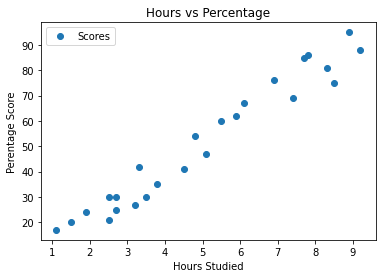

In [5]:
#Visualizing the dataset

df.plot(x='Hours',y='Scores',style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Perentage Score')
plt.show()

In [6]:
#Preparing the data

x = df.iloc[:,:-1].values
y = df.iloc[:,1].values

In [7]:
#Splitting the dataset

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [8]:
#Creating a linear regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

#Fitting the model
model.fit(X_train,y_train)

print("Training complete.")

Training complete.


In [9]:
#Print the coefficient and the intercept of the regression equation

print('Coefficients: ',model.coef_)
print('Intercept: ',model.intercept_)

Coefficients:  [10.46110829]
Intercept:  -1.5369573315500702


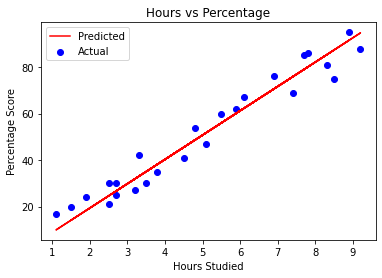

In [11]:
#Plot the regression line

plt.scatter(x,y,color='blue',label="Actual")
plt.plot(x, model.coef_[0]*x + model.intercept_, '-r',label="Predicted")
plt.title("Hours vs Percentage")
plt.legend()
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Score")
plt.show()

In [12]:
#Making predictions

print(X_test)
pred_y = model.predict(X_test)

[[1.1]
 [3.3]
 [1.9]
 [8.5]
 [4.8]]


In [13]:
#Comparing Actual vs Predicted

prediction = pd.DataFrame({'Actual': y_test, 'Predicted': pred_y})  
prediction

,Actual,Predicted
0,17,9.970262
1,42,32.984700
2,24,18.339148
3,75,87.382463
4,54,48.676362


In [22]:
#Prediction when x = 9.25

own_pred = model.predict([[9.25]])
print("The predicted score if a student studies for 9.25 hrs/day is",own_pred[0])

The predicted score if a student studies for 9.25 hrs/day is 95.22829438402952


In [20]:
#Evaluating the model

from sklearn import metrics
MAE = metrics.mean_absolute_error(y_test,pred_y)
MSE = metrics.mean_squared_error(y_test,pred_y)
RMSE = np.sqrt(MSE)
R2_score = metrics.r2_score(y_test,pred_y)

print("Mean Absolute Error: ",MAE)
print("Mean Squared Error: ",MSE)
print("Root Mean Squared Error: ",RMSE)
print("R2 score: ",R2_score)

Mean Absolute Error:  7.882398086270432
Mean Squared Error:  68.88092074277635
Root Mean Squared Error:  8.299453038771674
R2 score:  0.8421031525243527
